In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
import copy
from sklearn.cluster import KMeans
from sklearn import metrics

# matplotlib default parameters
plt.rcParams['figure.figsize'] = [3.0, 3.0]
plt.rcParams['figure.dpi'] = 100


In diesem Notebook geht es um Clustering. Wir empfehlen Ihnen, das Notebook Aufgabe für Aufgabe durchzuarbeiten, da viele Aufgaben auf vorherigen Aufgaben aufbauen.

# Aufgabe 1: K-means von Hand
Es sind 8 Datenpunkte und 2 Start-Centroids gegeben. Führen Sie auf dem Datensets von den Start-Centroids aus k-means-Iterationen durch bis sich die Centroids nicht mehr verändern.

#### Datenpunkte


In [2]:
toy_data = pd.DataFrame({'x': [2,2,4,4,6,6,8,8], 'y': [2,4,2,4,6,8,6,8]})
toy_data.style.hide_index()

#### Start-Centroids

In [3]:
centroids = pd.DataFrame({'x': [2,4], 'y': [1,1]})
centroids.style.hide_index()

#### Startzustand visualisiert

In [4]:
ax = toy_data.plot.scatter(x="x",y="y",c="black")
centroids.plot.scatter(x="x",y="y",c=["red","blue"], ax=ax, marker="x")

<AxesSubplot:xlabel='x', ylabel='y'>

Centroids nach Iteration 1:
     x         y
0  2.0  3.000000
1  6.0  5.666667


<AxesSubplot:xlabel='x', ylabel='y'>

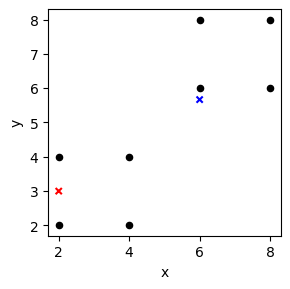

In [5]:
# Musterlösung: Iteration 1

# die 2 linken Punkte sind rot zugeordnet, alle anderen blau
print("Centroids nach Iteration 1:")
centroids1 = pd.DataFrame([np.mean(np.array([ [2,2],[2,4] ] ).T,axis=0), np.mean(np.array([ [4,4,6,6,8,8],[2,4,6,8,6,8]]).T ,axis=0)], columns=["x", "y"])
print(centroids1)
ax = toy_data.plot.scatter(x="x",y="y",c="black")
centroids1.plot.scatter(x="x",y="y",c=["red","blue"], ax=ax, marker="x")

In [6]:
# Musterlösung: Iteration 2

# die 4 linken Punkte sind rot zugeordnet, die 4 rechten blau. Die centroids liegen jeweils in der Mitte der 4 Punkte
print("Centroids nach Iteration 2")
centroids2 = pd.DataFrame([np.mean(np.array([ [2,2,4,4],[2,4,2,4] ] ).T ,axis=0), np.mean(np.array([ [6,6,8,8],[6,8,6,8]]).T ,axis=0)], columns=["x", "y"])
print(centroids2)
ax = toy_data.plot.scatter(x="x",y="y",c="black")
centroids2.plot.scatter(x="x",y="y",c=["red","blue"], ax=ax, marker="x")

# In Iteration 3 ändert sich nichts mehr, also ist der kmeans konvergiert

Centroids nach Iteration 2
     x    y
0  3.0  3.0
1  7.0  7.0


<AxesSubplot:xlabel='x', ylabel='y'>

# Teil 2: K-means implementieren
Ihre Aufgabe ist nun, K-Means selbst zu implementieren. Hierzu werden Sie Code-Gerüste (siehe unten) ergänzen.

Gegeben ist eine Funktion, die ein Clustering visualisiert (siehe unten), und eine Funktion, die zufällige Initiale Centroids generiert.
Weitere Informationen sind im Code als Kommentare enthalten.

Sie können Ihren Code zunächst mit dem Beispiel aus der Handsimulation testen (`toy_data`). Weiter unten führen wir ein größeres Datenset mit 500 Datenpunkten ein.  


### Gegebene Hilfsfunktionen: Visualisierung und random_centroids

In [7]:
def visualize_K_means(data,centroids,assignments):
    """
    Visualisiert ein 2-dimensionales K-Means Clustering (Spaltennamen "x" und "y"). Die Funktion zeichnet einen Plot, der die Datenpunkte und die Centroids enthält. Datenpunkte sind nach Centroid-Zuordnung gefärbt.

    Argumente:
      data:  eine Matrix mit Dimension N x 2. Jede Zeile enthält einen von N Datenpunkten
      centroids: eine Matrix mit Dimension M x 2. Jede Zeile enthält einen M Centroids
      assignments: Ein Vektor mit N Zeilen. Jede Zeile enhält die Cluster-Zuordnung für den jeweiligen Datenpunkt (0 bis M-1)
    """
    plt.figure()
    colors = plt.cm.get_cmap("hsv", centroids.shape[0]+1)

    all_data = data.copy()
    all_data["assignments"] = assignments.astype('int')
    all_data["assignments"] = all_data["assignments"].astype('category')

    groups = all_data.groupby("assignments")
    for centroid, group in groups:
        plt.plot(group["x"], group["y"], marker="o", linestyle="", label=centroid, zorder=1)
        plt.scatter(centroids[centroid,0],centroids[centroid,1],marker='s',edgecolors='white',s=200, zorder=2)

    plt.legend()
    plt.grid(b=True, which='both', axis='both')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(str(centroids.shape[0]) + " clusters")


In [8]:
def random_centroids(data,count):
    mean = np.mean(data, axis=0)
    var = np.var(data,axis=0)
    centroids = np.zeros((count,2))
    for i in range(count):
        centroids[i][0] = np.random.uniform(mean[0]+np.random.uniform(-1,1)*var[0])
        centroids[i][1] = mean[1]+np.random.uniform(-1,1)*var[1]
    return(centroids)

### Aufgabe 2.1: Ihre Implementierung
Die K-Means-Implementierung basiert auf zwei zentralen Funktionen: `assign_to_centroids()` und `new_centroids()`. Unten finden Sie Beschreibungen und Gerüste für beide Funktionen. Ihre Aufgabe ist es, diese zu vervollständigen.

Mit diesen Funktionen ist das Auführen einer K-Means Iteration einfach. Gehen wir zum Beispiel von folgendem Startzustand für das obige toy Datenset aus. Wir arbeiten mit 2 Centroids, deren initiale Koordinaten wir zufällig generieren. Zusätzlich generieren wir zufällige initiale Zuordnungen der Datenpunkte. Das kann dann so aussehen:


In [12]:
# Zufälliger 
num_centroids = 2
initial_centroids = random_centroids(toy_data, num_centroids)
initial_assignments = np.random.randint(num_centroids, size=toy_data.shape[0]) # zufällige initiale Zuordnungen
visualize_K_means(toy_data, initial_centroids, initial_assignments)


Mit diesem Startzustand können Sie nun, sobald Sie die beiden Funktionen `assign_to_centroids()` und `new_centroids()` implementiert haben, mit folgendem Code sehr einfach eine Iteration von K-Means laufen lassen. Aktuell funktioniert der Code natürlich noch nicht.

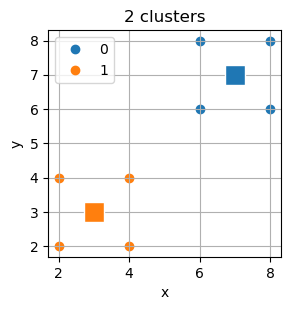

In [14]:
# eine K-Means-Iteration
assignments = assign_to_centroids(toy_data, initial_centroids)
centroids = new_centroids(toy_data,initial_centroids,assignments)
visualize_K_means(toy_data,centroids,assignments)

assignments = assign_to_centroids(toy_data, initial_centroids)
centroids = new_centroids(toy_data,initial_centroids,assignments)
visualize_K_means(toy_data,centroids,assignments)

In [ ]:
def assign_to_centroids(data,centroids):
    """
    Berechnet für gegebene Datenpunkte und Centroids neue Centroid-Zuordnungen
    
    Argumente:
      data:  eine Matrix mit Dimension N x 2. Jede Zeile enthält einen von N Datenpunkten
      centroids: eine Matrix mit Dimension M x 2. Jede Zeile enthält einen M Centroids
    
    Rückgabe:
      Ein Vektor mit N Zeilen. Jede Zeile enhält die Cluster-Zuordnung für den jeweiligen Datenpunkt (0 bis M-1) 
    """
    
    assignments = np.zeros( (data.shape[0],) )
    
    # Hilfestellung (muss nicht verwendet werden):
    for i in range(data.shape[0]):
        distance = np.zeros( (centroids.shape[0],1) )
        for j in range(centroids.shape[0]):
            # your code here
            print("Noch nicht implementiert")
        
            
    return(assignments)

# Potentiell hilfreiche Funktionen:
# np.linalg.norm(point1 - point2)  -- berechnet die Distanz zwischen zwei Punkten
# np.argmin() -- bestimmt den Index, dessen Value minimal ist entlang einer Dimension (0 or 1 in unserem Fall)

In [9]:
# Musterlösung
def assign_to_centroids(data,centroids):
    
    assignments = np.zeros( (data.shape[0],) )
    
    for i in range(data.shape[0]):
        distance = np.zeros( (centroids.shape[0],1) )
        for j in range(centroids.shape[0]):
            distance[j] = np.linalg.norm(data.loc[i] - centroids[j])
        min_distance = np.argmin(distance)
        assignments[i] = min_distance
        
    return(assignments)

In [ ]:
def new_centroids(data,old_centroids,assignments):
    """
    Berechnet für gegebene Datenpunkte und Centroid-Zuordnungen neue Centroids.
        
    Argumente:
      data:  eine Matrix mit Dimension N x 2. Jede Zeile enthält einen von N Datenpunkten
      old_centroids: eine Matrix mit Dimension M x 2. Jede Zeile enthält einen M Centroids
      assignments: ein Vektor mit N Zeilen. Jede Zeile enthält die Zuordnung für einen Datenpunkt (0 bis M-1)
      
    Rückgabe:
      eine Mx2 Matrix. Jede Zeile enthält die (neuen) Koordinaten eines Centroids
    """
    
    centroids = old_centroids
    for i in range(old_centroids.shape[0]):
        # your code here
        print("Noch nicht implementiert")
    
    return(centroids)


    
# Potentiell hilfreiche Funktionen:
# np.mean() -- berechnet den Mittelwert entlang der angegebenen Dimension (0 oder 1 in unserem Fall)

In [10]:
# Musterlösung
def new_centroids(data,old_centroids,assignments):
    #data ist eine Nx2 Matrix, jede Zeile enthält einen Datenpunkt
    #old_centroids ist eine Mx2 Matrix, jede Zeile enthält den Centroid aus der letzten Iteration
    #assignments ist ein Vektor mit N Zeilen, jede Zeile steht für einen Datenpunkt und
    #enthält den Integerwert des nähsten Centroids (0 für Centroid 0, 1 für Centroid 1, usw.)
    
    centroids = old_centroids
    for i in range(old_centroids.shape[0]):
        filtered_data = data[ i == assignments ]
        if (filtered_data.size > 0):
            centroids[i] = np.mean(filtered_data,axis=0)
    
    return(centroids)

## Aufgabe 2.2: K-Means auf größerem Datenset laufen lassen
Wir laden nun ein größeres Datenset. Ihre Aufgabe ist es, mit Ihrer K-Means Implementierung einige K-Means-Iterationen auf diesem Datenset laufen zu lassen. Visualisieren Sie das Clustering zu Beginn und nach jeder Iteration. Wie viele Iterationen sind notwendig, um ein "sinnvolles" Clustering zu erreichen? Wie viele Cluster halten Sie für sinnvoll?  


In [11]:
# Datenset laden
data = pd.DataFrame(np.loadtxt('./resources/08_data_science/cluster.dat',dtype="float64").T, columns=["x","y"])
print("Dimension des Datensets: 500 Zeilen, 2 Spalten: " + str(data.shape))
data.head()

Dimension des Datensets: 500 Zeilen, 2 Spalten: (500, 2)


x         y
0  2.195194  0.119758
1  0.652289 -0.565997
2  1.029164 -0.078276
3 -1.095304 -0.777123
4  1.972860  0.830741

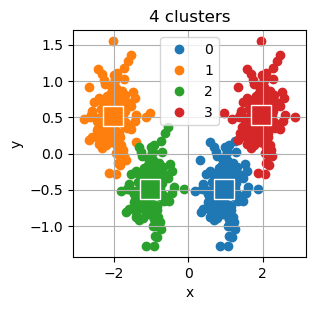

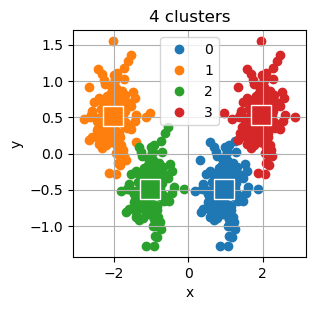

In [16]:
num_centroids = 4
initial_centroids = random_centroids(data, num_centroids)
initial_assignments = np.random.randint(num_centroids, size=data.shape[0]) # zufällige initiale Zuordnungen
visualize_K_means(data, initial_centroids, initial_assignments)

assignments = assign_to_centroids(data, initial_centroids)
centroids = new_centroids(data,initial_centroids,assignments)
visualize_K_means(data,centroids,assignments)

assignments = assign_to_centroids(data, initial_centroids)
centroids = new_centroids(data,initial_centroids,assignments)
visualize_K_means(data,centroids,assignments)

assignments = assign_to_centroids(data, initial_centroids)
centroids = new_centroids(data,initial_centroids,assignments)
visualize_K_means(data,centroids,assignments)

assignments = assign_to_centroids(data, initial_centroids)
centroids = new_centroids(data,initial_centroids,assignments)
visualize_K_means(data,centroids,assignments)

assignments = assign_to_centroids(data, initial_centroids)
centroids = new_centroids(data,initial_centroids,assignments)
visualize_K_means(data,centroids,assignments)

assignments = assign_to_centroids(data, initial_centroids)
centroids = new_centroids(data,initial_centroids,assignments)
visualize_K_means(data,centroids,assignments)


## Aufgabe 2.3: Mehrere Iterationen von K-means
Ergänzen Sie unten die Funktion `k_means`, um das Ausführen mehrerer K-Means-Iterationen zu automatisieren. Die Funktion soll eine gegebene Zahl von K-Means-Iterationen durchführen.


In [ ]:
def k_means(data, centroids, iterations):
    """
    Führt eine gegebene Zahl von K-Means-Iterationen durch.

    Argumente:
      data: Datenset (Nx2)
      centroids: Initiale Centroids (Mx2)
      iterations: Zahl der durchzuführenden Iterationen

    Rückgabe:
      Eine Liste von neuen Centroids
    """

    # your code goes here
    print("Noch nicht implementiert")

    return(centroids)

In [21]:
# Musterlösung
def k_means(data,centroids,iterations):
        
    #Wie viele Durchläufe k-means haben soll
    for j in range(iterations):
        assignments = assign_to_centroids(data,centroids)
        visualize_K_means(data,centroids,assignments)
        centroids = new_centroids(data,centroids,assignments)
    return(centroids)


## Aufgabe 2.4 (optional): K-means mit Stop-Kriterium
Da die Zahl der benötigten Iterationen oft vor dem Clustering nicht bekannt ist, wird für K-Means oft mit einem Stop-Kriterium gearbeitet. Ihre Aufgabe ist nun, eine Variante der k_means-Funktion zu implementieren, die mit solch einem Kriterium selbst entscheidet, wie viele Iterationen sie ausführen will.

Hinweis: Eine Variante, solch ein Kriterium umzusetzen, ist, die Veränderungen der Centroids von einer Iteration zur nächsten zu beobachten. Es sind aber auch andere Varianten denkbar.


In [ ]:
def k_means_stop(data, centroids):
    """
    Führt K-Means aus und terminiert selbstständig, wenn ein Stop-Kriterium erfüllt ist.

    Argumente:
      data: Datenset (Nx2)
      centroids: Initiale Centroids (Mx2)

    Rückgabe:
      Eine Liste von neuen Centroids
    """

    # your code here
    print("Noch nicht implementiert")
    num_iterations = -1
    assignments = -1

    return (centroids, num_iterations, assignments)

In [22]:
# Musterlösung (eine von vielen möglichen Varianten)
def calc_diff(old_centroids,new_centroids):
    #return die höchste Differenz die ein Centroid nach Verschiebung zu seiner letzten Position hat
    
    max_diff = np.amax( np.linalg.norm(old_centroids-new_centroids) )
    return(max_diff)

def k_means_stop(data,centroids,threshold):
    #just for visualizing
    colors = []
    for j in range(centroids.shape[0]):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    #preparation
    old_centroids = np.zeros(centroids.shape)
    difference = np.iinfo("int64").max
    count = 0
    
    #laufe solange, bis die höchste Differenz eines Centroids zu seiner Vorgängerposition < threshold ist
    while (difference > threshold):
        #main function 1
        assignments = assign_to_centroids(data,centroids)
        #visualisierung
        visualize_K_means(data,centroids,assignments,colors)
        old_centroids = copy.deepcopy(centroids)
        #main function 2
        centroids = new_centroids(data,centroids,assignments)
        #Differenzberechnung
        difference = calc_diff(old_centroids,centroids)
        #erhöhe den Turn-Count
        count += 1
    return(centroids,count,assignments)

# Aufgabe 2.5: Die Grenzen von K-Means
Setzen Sie die initialen Centroids manuell. Ist es möglich Startpunkte so zu wählen, dass K-Means kein sinnvolles Clustering findet?

In [17]:
# Centroids manuell setzen
centroids = np.array([[-0.5,0.5],[0.5,-0.5]],dtype="float64").T

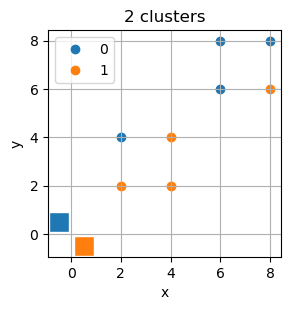

In [18]:
# K-Means implementierung aus Aufgabe 2.1 zum visualisieren
num_centroids = 2
initial_centroids = centroids
initial_assignments = np.random.randint(num_centroids, size=toy_data.shape[0]) # zufällige initiale Zuordnungen
visualize_K_means(toy_data, initial_centroids, initial_assignments)

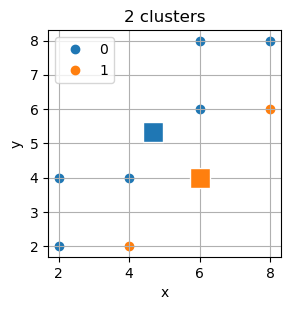

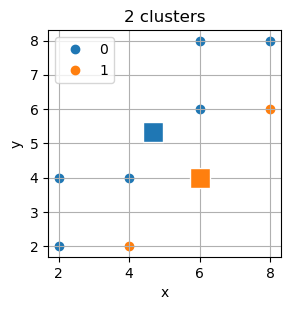

In [20]:
# eine K-Means-Iteration
assignments = assign_to_centroids(toy_data, initial_centroids)
centroids = new_centroids(toy_data,initial_centroids,assignments)
visualize_K_means(toy_data,centroids,assignments)

assignments = assign_to_centroids(toy_data, initial_centroids)
centroids = new_centroids(toy_data,initial_centroids,assignments)
visualize_K_means(toy_data,centroids,assignments)


assignments = assign_to_centroids(toy_data, initial_centroids)
centroids = new_centroids(toy_data,initial_centroids,assignments)
visualize_K_means(toy_data,centroids,assignments)

assignments = assign_to_centroids(toy_data, initial_centroids)
centroids = new_centroids(toy_data,initial_centroids,assignments)
visualize_K_means(toy_data,centroids,assignments)

# Exkurs: Elbow-Methode
Die Elbow-Methode ist eine weit verbreitete Heuristik, um die Zahl von Clustern (das k) zu bestimmen.
Der untenstehende Code führt zunächst für verschiedene k jeweils mehrere K-Means-Durchläufe durch und visualisiert für jedes k das errechnete Clustering für einen dieser Durchläufe.  
Lassen Sie den Code laufen und untersuchen Sie die Visualisierungen. Wie viele Cluster halten Sie für dieses Datenset für sinnvoll?

Wir verwenden hierzu die [K-Means-Implementierung von scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Sie können natürlich auch Ihre Implementierung nutzen. Diese läuft eventuell etwas langsamer. 


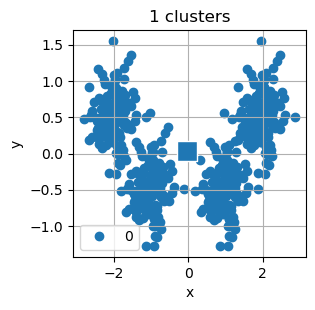

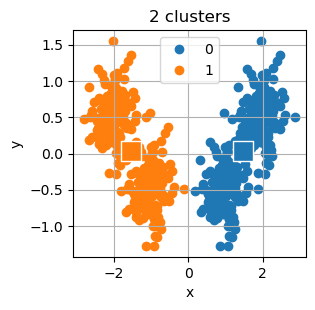

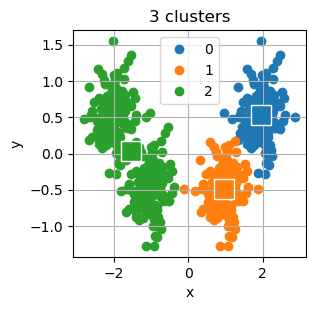

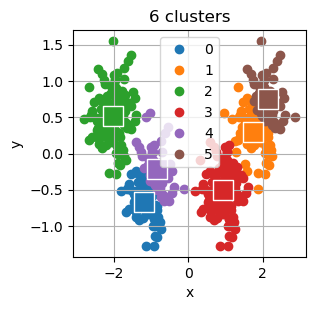

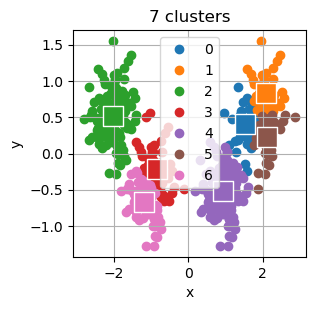

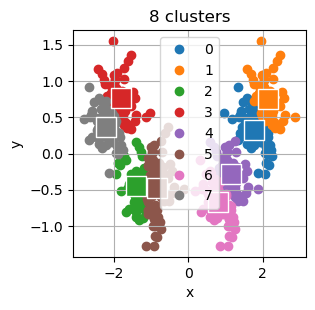

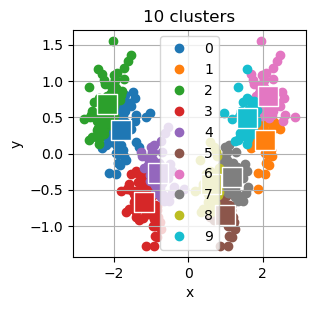

In [23]:
max_k = 10 # maximale zu testendes k
n = 5 # Zahl der durchgeführten Clusterings pro k
score = np.zeros((max_k,n))
iterations = np.zeros((max_k,n))
threshold = 1e-4

# Wir probieren k=1..max_k
for i in range(0,max_k):
    k = i+1

    # n Durchläufe für jedes k
    for j in range(n):
        
        # k-means laufen lassen für dieses k, startet mit zufälligen centroids
        kmeans_model = KMeans(n_clusters=k,tol=threshold,init="random").fit(data)
        assignments = kmeans_model.labels_
        centroids = kmeans_model.cluster_centers_
        
        # (für später) Wir notieren für diesen Durchlauf (1) den Abstand der Punkte zu ihren Centroids
        score[i][j] = kmeans_model.inertia_
        # und (2) die Zahl der Iterationen, die K-Means durchgeführt hat
        iterations[i][j] = kmeans_model.n_iter_

    # wir visualisieren den letzten der Durchläufe für dieses k
    visualize_K_means(data,centroids,assignments)


Nun wenden wir die Elbow-Methode an. Für jeden Durchlauf hat der Code eine Art "Qualität" des entstandenen Clusterings errechnet. Dazu misst er die Distanz jedes Datenpunktes zum nächsten Centroid. Diese Distanzen quadrieren wir und summieren dann die quadrierten Distanzen aller Datenpunkte. Je kleiner diese Summe, desto "genauer" fassen die Centroids das Datenset zusammen. scikit-learn erledigt dies automatisch und stellt uns diese Summe im Attribut `inertia_` des Modell-Objekts bereit. 

Wie viele Cluster halten Sie jetzt für sinnvoll?

Warum führen wir mehrere Durchläufe für jedes k durch? Was passiert wenn wir dies nicht tun?

In [24]:
plt.plot(np.arange(1,max_k+1),np.mean(score,axis=1)[:,],"o-")
plt.grid(b=True, which='both', axis='both')
plt.xlabel("k")
plt.ylabel("Summe der Abstände")
t = plt.title("Durchschnittliche Summe der quadrierten \nAbstände zum nächsten Centroid")



Wie ändert sich die Zahl der ausgeführten Iterationen, wenn wir `k` erhöhen? Warum?

In [25]:
plt.plot(np.arange(1,max_k+1),np.mean(iterations,axis=1)[:,],"*-",color="red")
plt.grid(b=True, which='both', axis='both')
plt.xlabel("k")
plt.ylabel("Iterationen")
t = plt.title("Zahl der durchschnittlich \ndurchgeführten Iterationen")

# Aufgabe 3: Mögliche und Unmögliche K-Means-Ergebnisse
Welche der folgenden Clusterings sind als Ergebnis einer
konvergierten k-Means-Clusteranalyse möglich, welche sind unmöglich?

![Clusterings](resources/08_data_science/kmeans_clusterings.png)

Musterlösung:
A und D sind unmöglich